https://stackoverflow.com/questions/11874767/how-do-i-plot-in-real-time-in-a-while-loop-using-matplotlib 

https://matplotlib.org/stable/api/animation_api.html

the following is set up and testing for future implimentation of live plotting in python based on above stackoverflow discussion

In [4]:
import numpy
import matplotlib
from matplotlib import pyplot as plot
import time


In [51]:
def randomwalk(dims = (256,256), n=20, sigma = 5, alpha =0.95, seed =1):
    # vaules set in funciton line w/ = are not required in future function calls. Function values default to the above. non-default values may be used but are not required.
    """ random walk with memory"""

    r, c = dims    #dimensions of the plot window(?)
    gen = numpy.random.RandomState(seed)  #generate random number seed?
    pos = gen.rand(2,n) * ((r,),(c,))  #array of random numbers. n columns, 2 rows. 
    old_delta = gen.rand(2,n) * sigma  #initial generation of randomly assigned 'previous' delta array

    while(True):
        delta = (1. - alpha) * gen.randn(2,n) * sigma + alpha * old_delta
        pos += delta    #equivilant to pos = pos + delta
        for ii in range(n):  #from 0 to n-1
            if not(0. <= pos[0,ii]<r):
                pos[0,ii] = abs(pos[0,ii] % r)
            if not(0. <= pos[1,ii]<c):
                pos[1,ii] = abs(pos[1,ii]%c)
            old_delta = delta
        yield pos

In [60]:
rw = randomwalk()
x,y = next(rw)
print(x)
print(y)

[111.52612021 188.17814247   1.17278943  81.45943244  38.18806404
  25.6916513   52.12057229  89.8393204  103.22231361 138.93467383
 107.95218259 178.2915368   52.98398103 225.93329388   9.38620563
 172.11219693 109.63599677 143.21600651  38.66170658  54.24482708]
[205.5342218  250.03223212  83.47940832 179.15175162 224.63954227
 231.6673267   24.97391761  12.47349995  47.79574693 227.68500827
  29.49840388 108.73892782 246.18101184 140.37171068 178.91568491
  81.39775137 180.25577683 215.33539486   8.16219307 195.49633427]


In [74]:
def run(niter = 1000, doblit = True):
    """
    Adisplay the simulation using matplotlib, optionally using blit for speed
    """

    fig, ax = plot.subplots(1,1)  # creates figure 
    ax.set_aspect('equal')       #axis equal
    ax.set_xlim(0,255)
    ax.set_ylim(0,255)
    rw = randomwalk()           #previously defined walk funciton
    x,y = next(rw)              #not entirely sure what next does

    plot.show(False)
    plot.draw()

    if doblit:
        #cache the background 
        #this method is intended to save time by keeping the plot window persistant
        background = fig.canvas.copy_from_bbox(ax.bbox)

    points = ax.plot(x,y, 'o')[0]  #plots xy values. not sure what the 0 is doing here. 
    tic = time.time()              #starts the timer 

    for ii in range(niter):
        # update the xy data
        x,y = next(rw)             #again, not sure what next is doing here but it does update the values
        points.set_data(x,y)       #updating the xy datapoints in the figure
        
        if doblit:
            #restores the background
            fig.canvas.restore_region(background)

            #redraw just the points
            ax.draw_artist(points)

            #fill int he axes rectangle
            fig.canvas.blit(ax.bbox)

        else:
            #redraw the entire figure
            fig.canvas.draw()

    plot.close(fig)
    print("Blit = %s, average FBS: %.2f" % (
        str(doblit), niter/(time.time() - tic)))

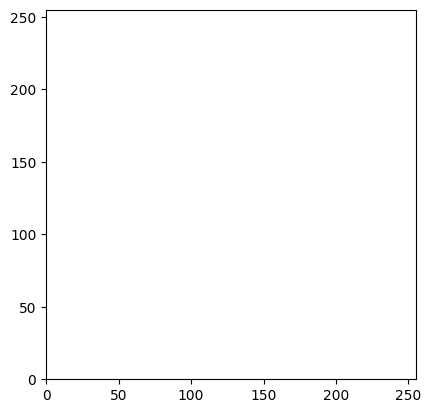

Blit = False, average FBS: 81.29


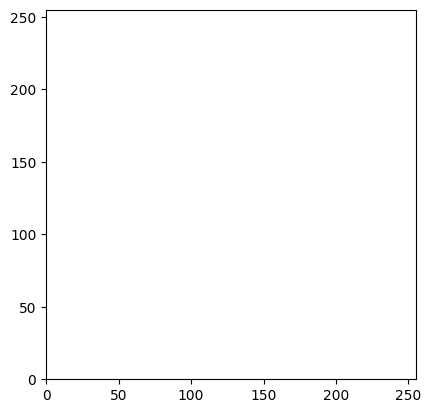

Blit = True, average FBS: 4089.70


In [78]:
if __name__ == '__main__':
    run(doblit = False)
    run(doblit = True)

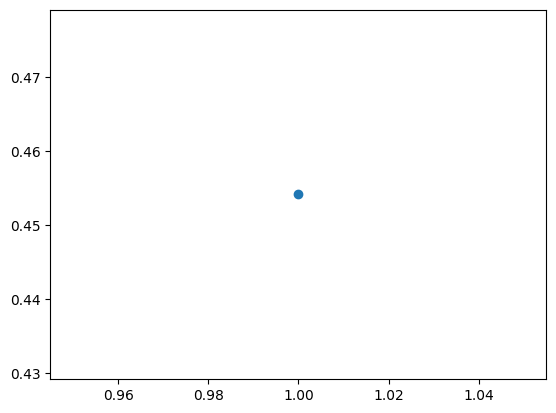

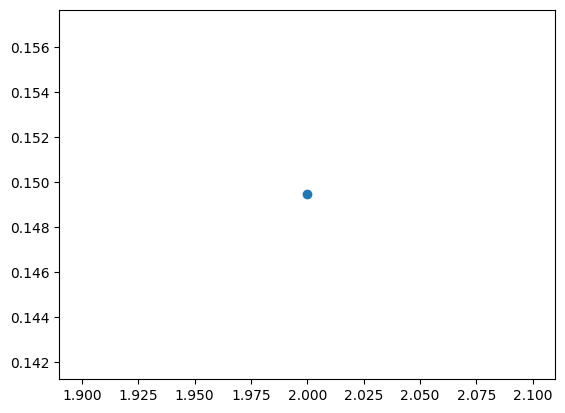

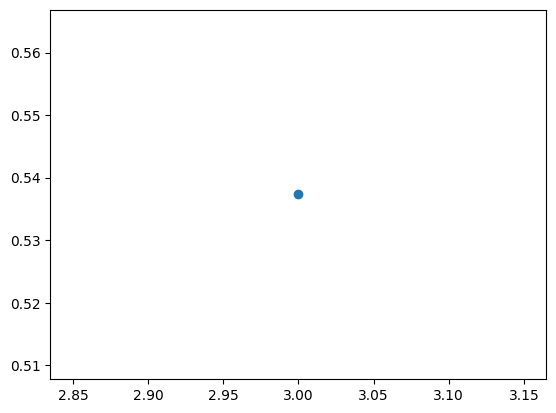

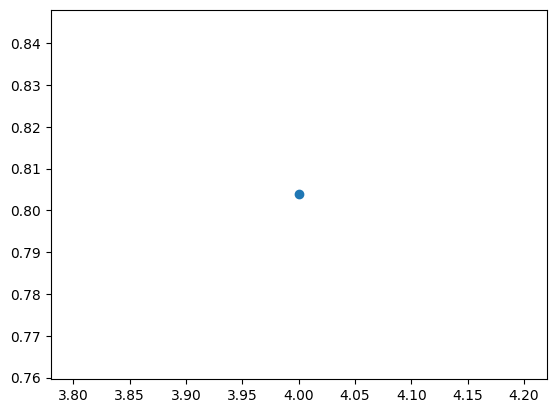

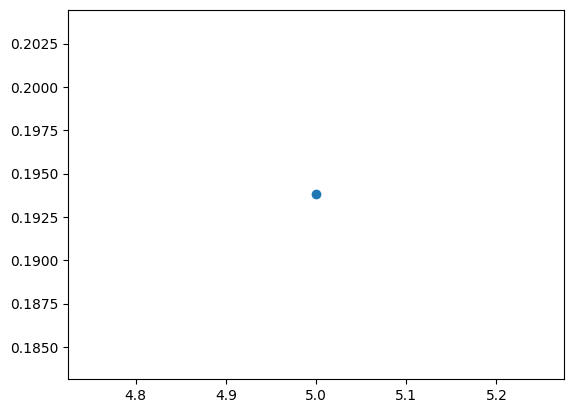

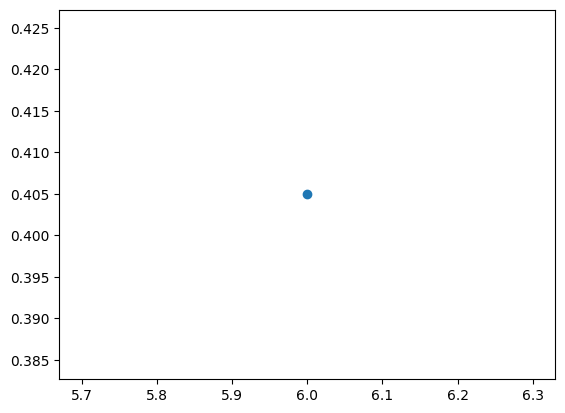

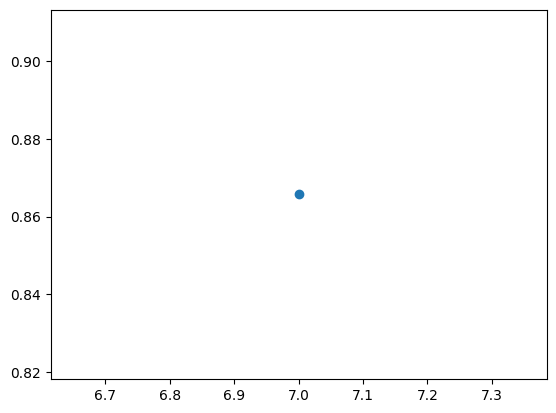

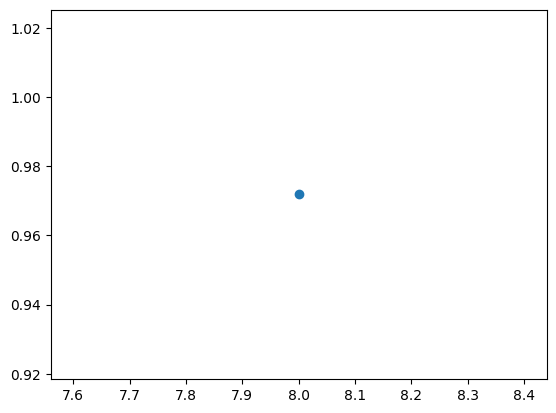

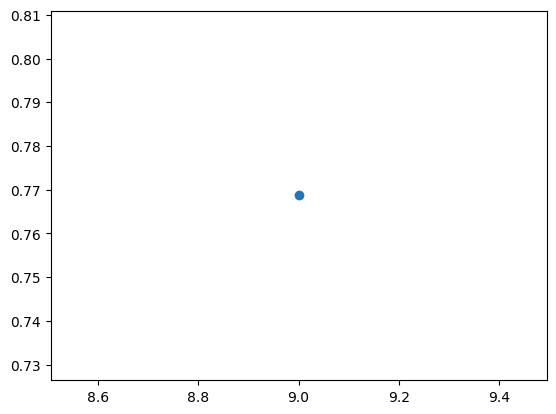

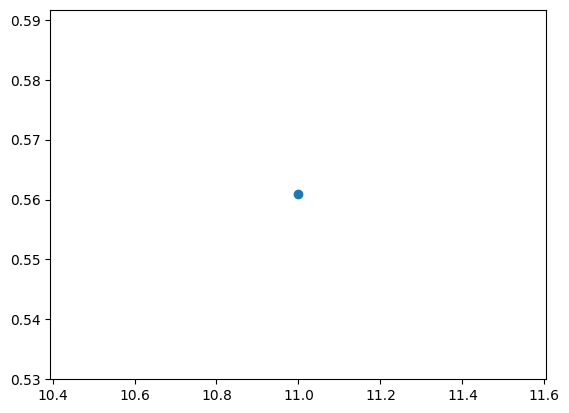

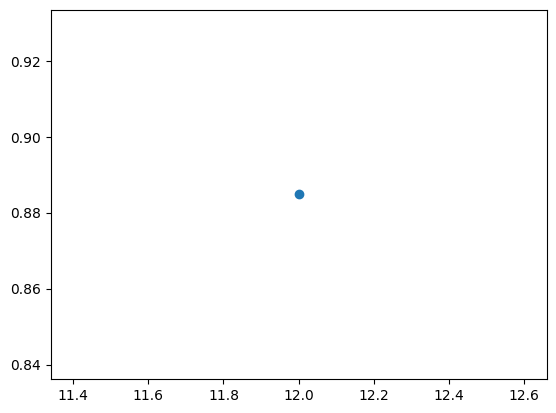

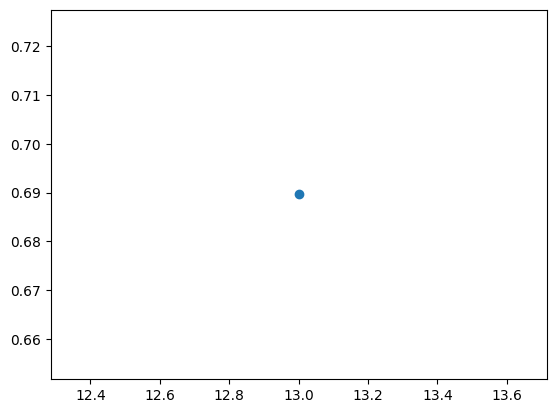

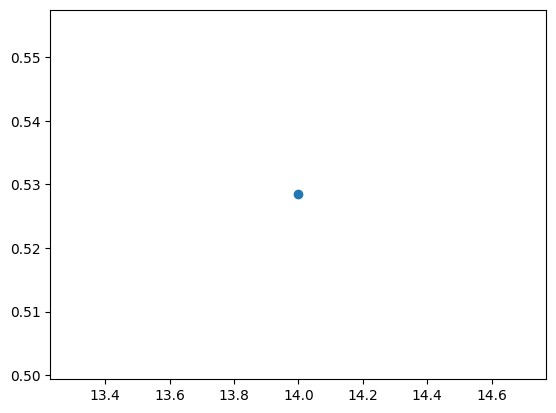

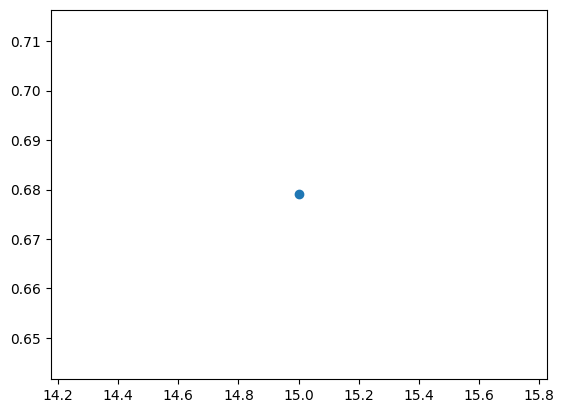

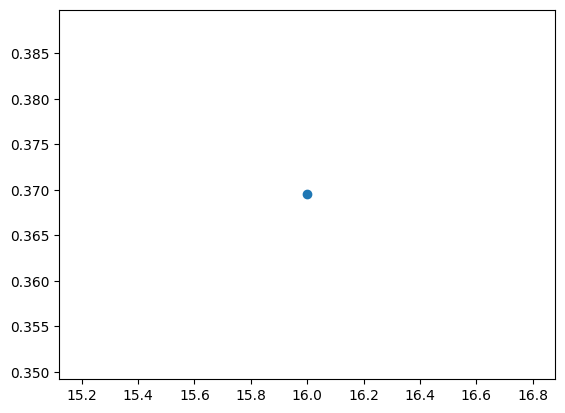

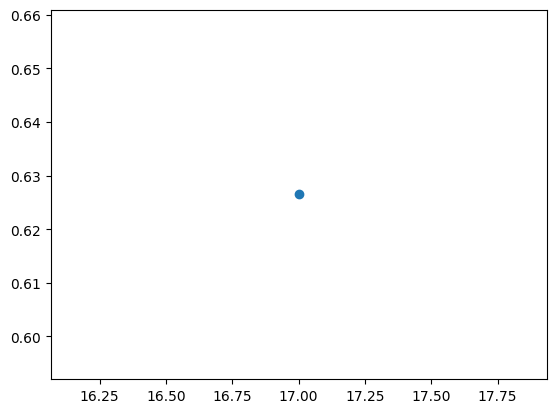

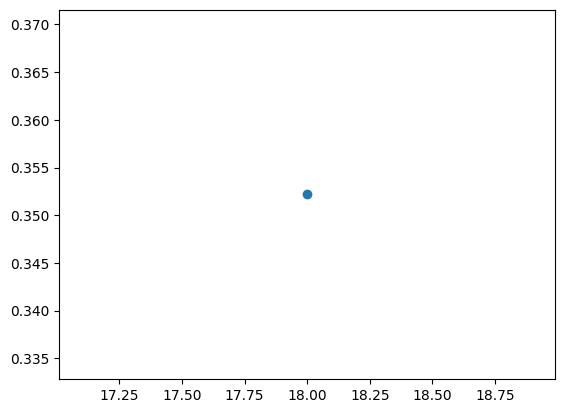

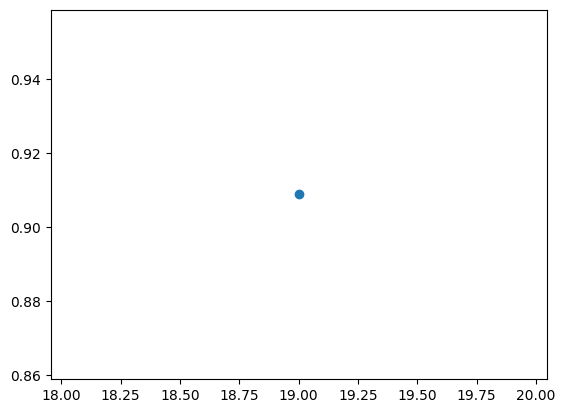

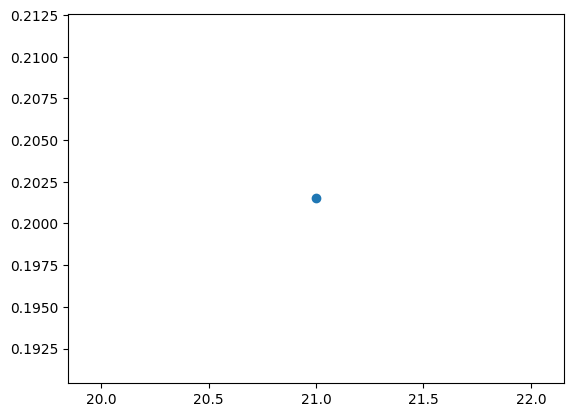

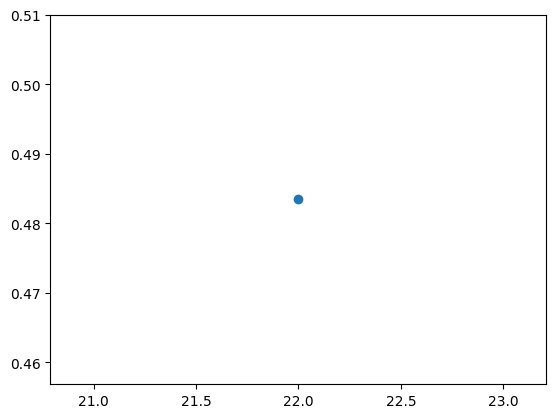

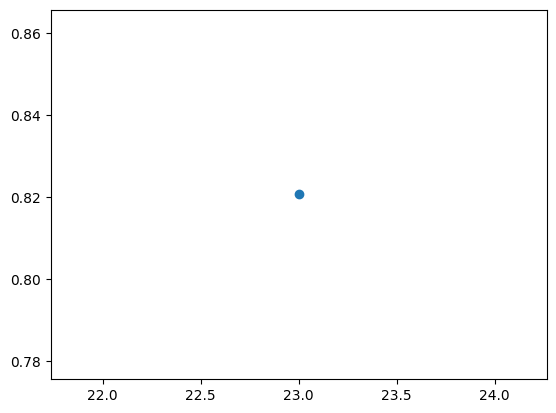

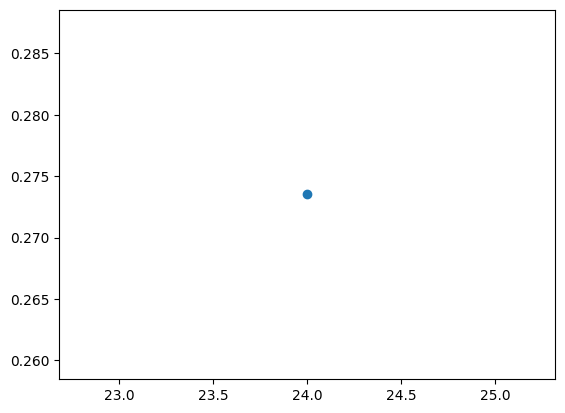

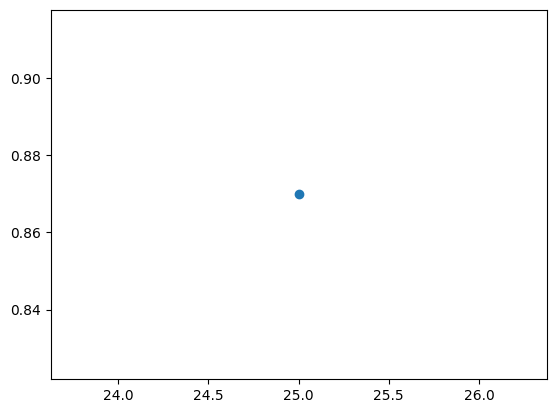

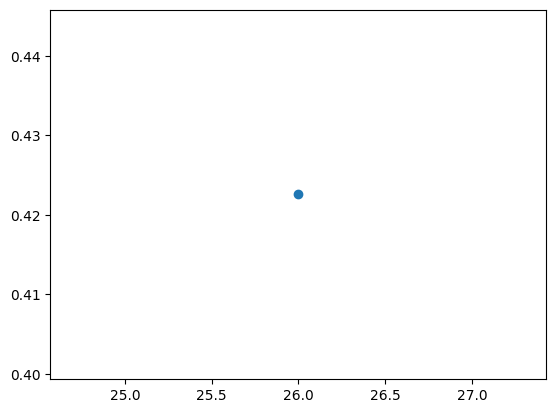

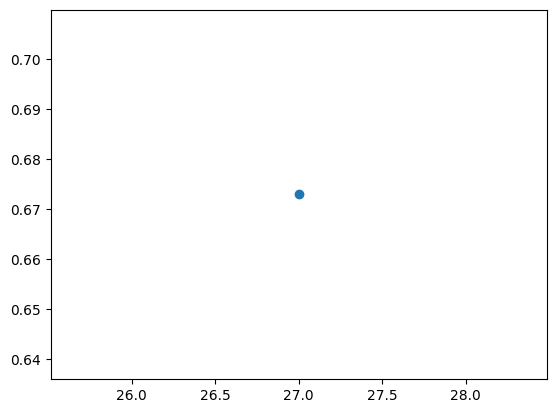

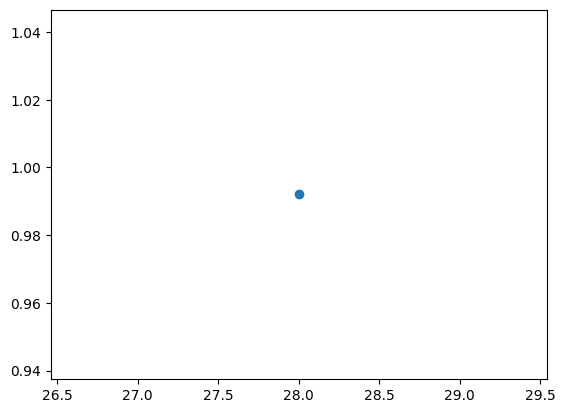

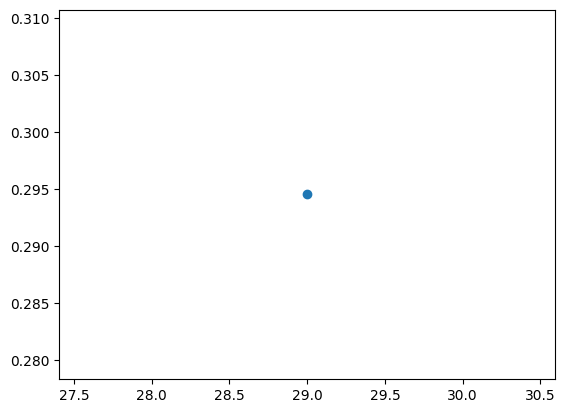

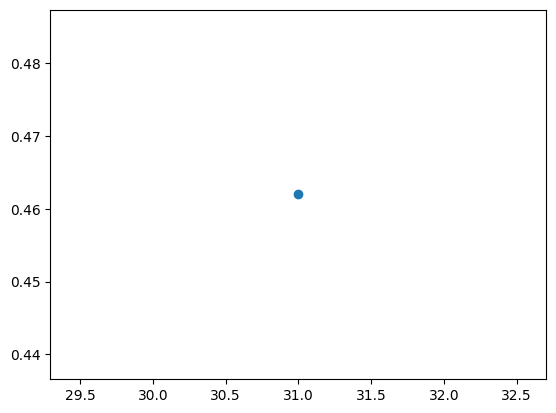

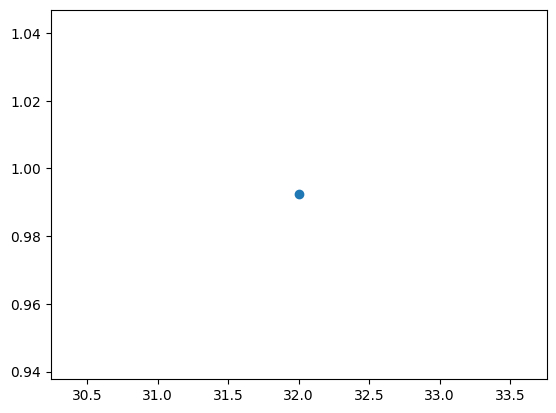

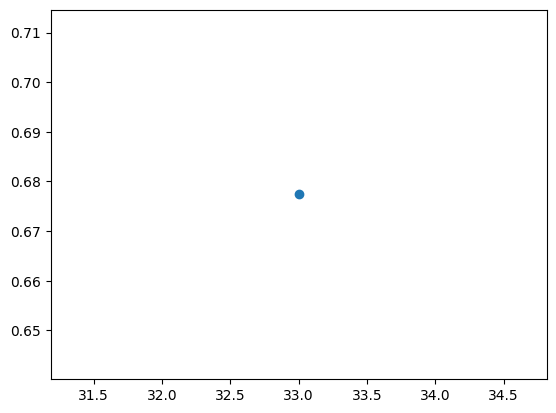

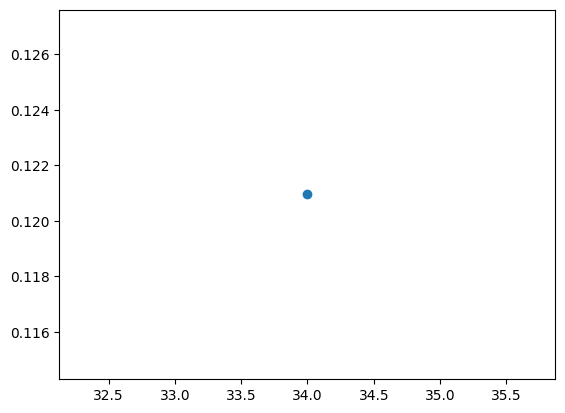

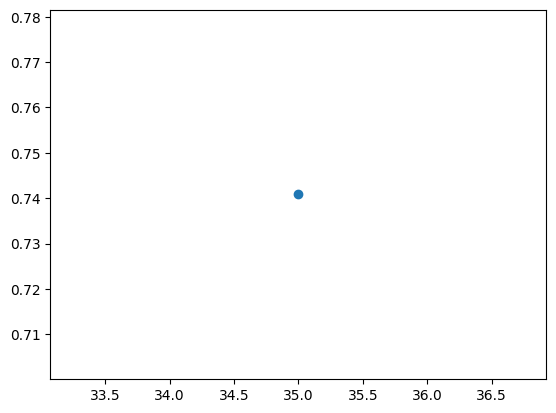

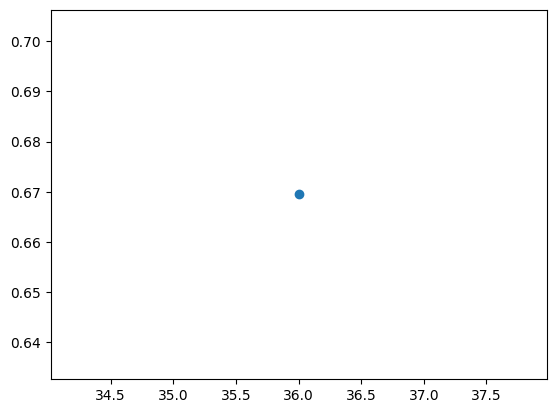

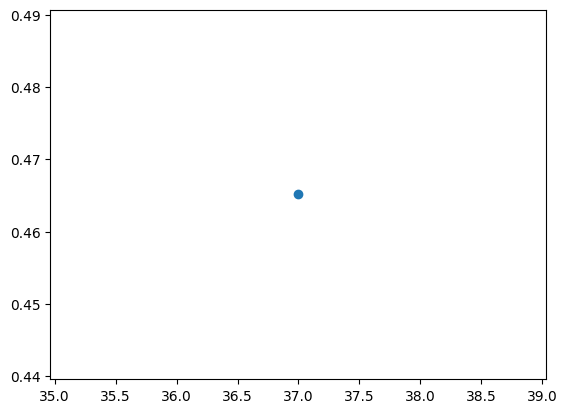

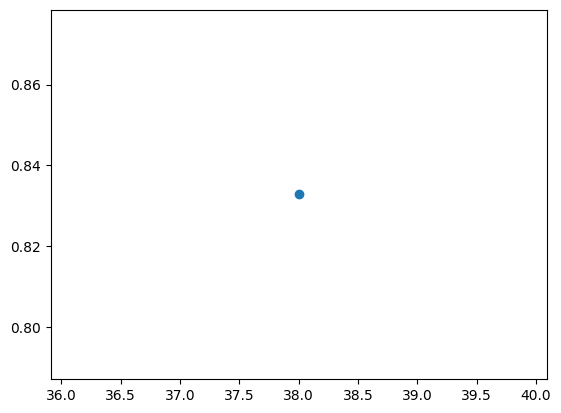

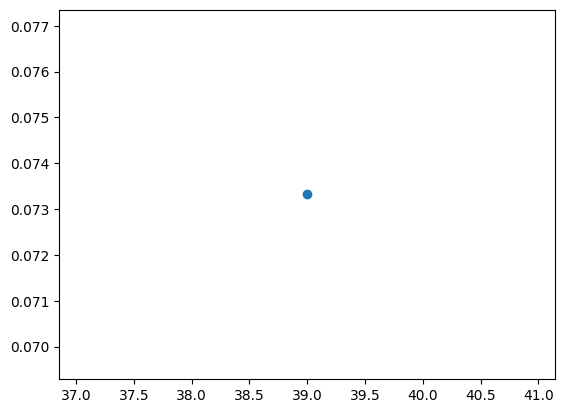

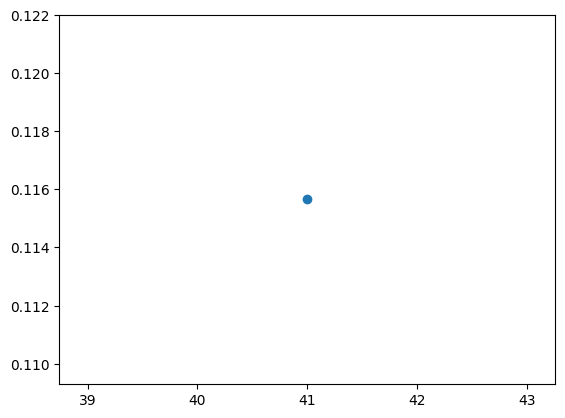

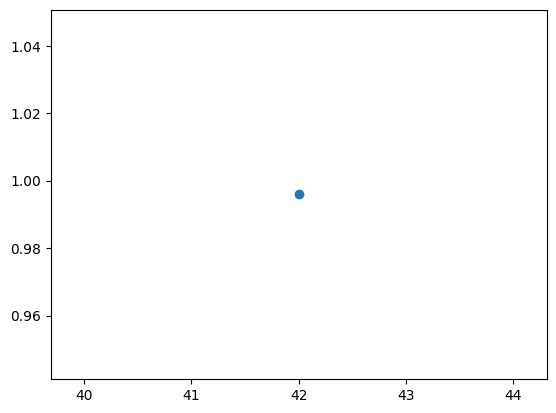

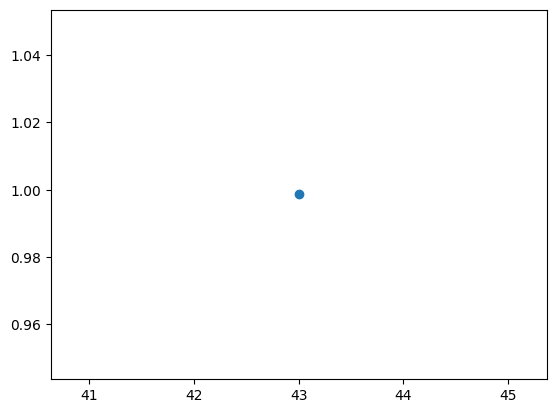

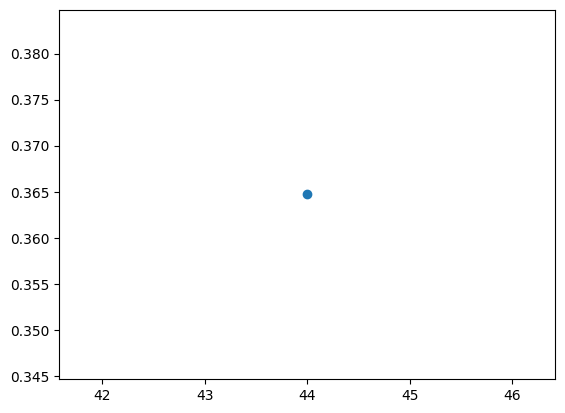

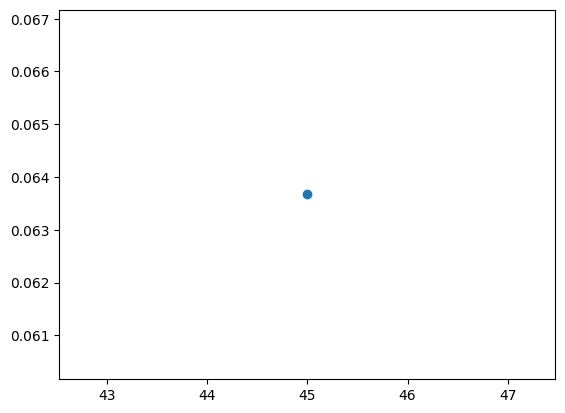

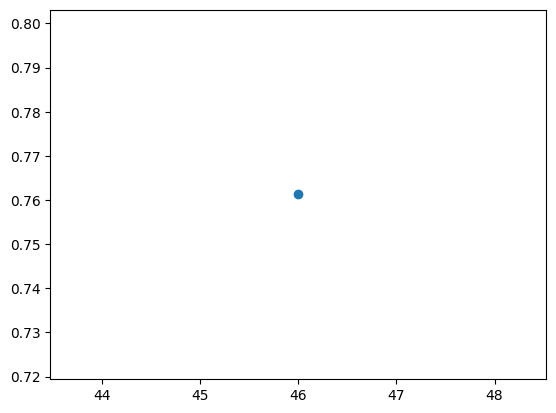

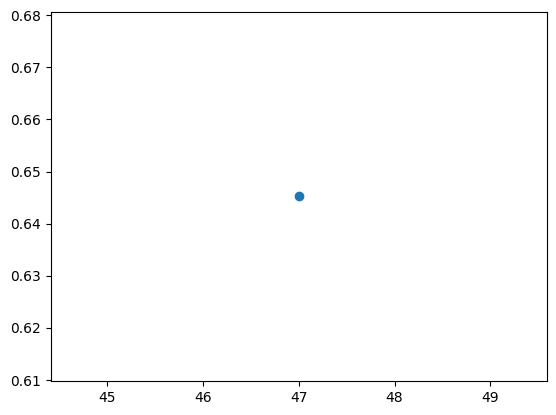

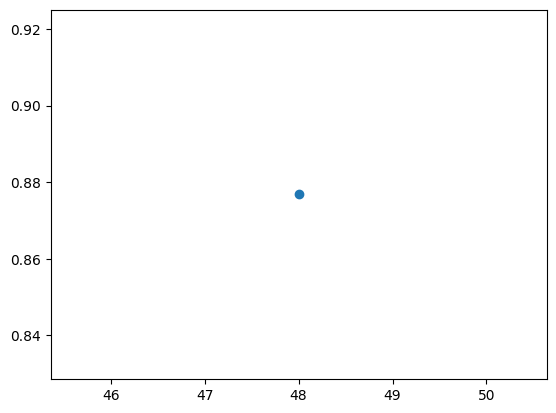

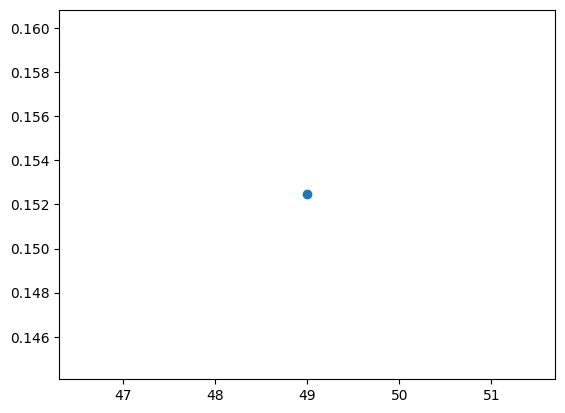

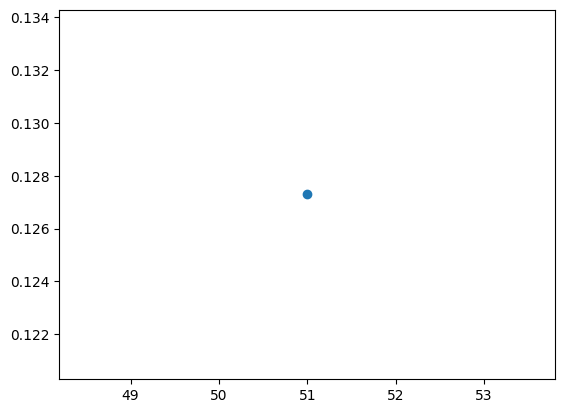

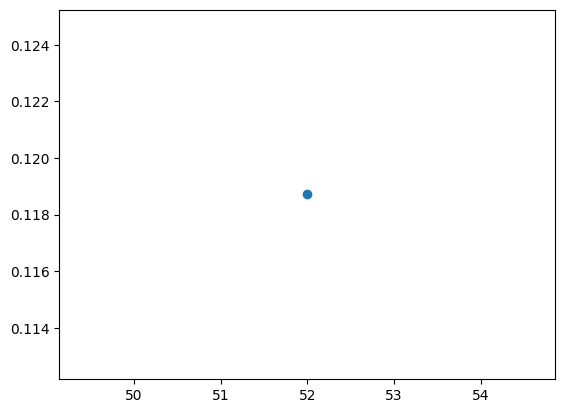

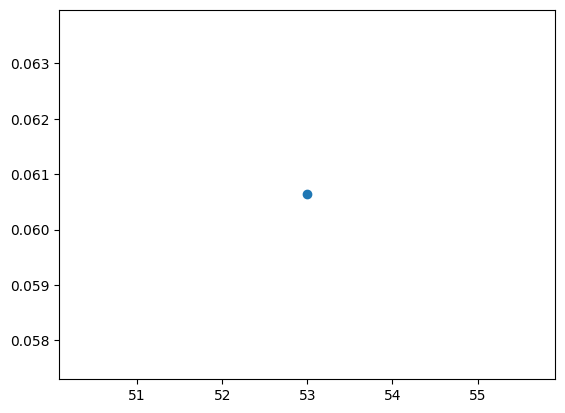

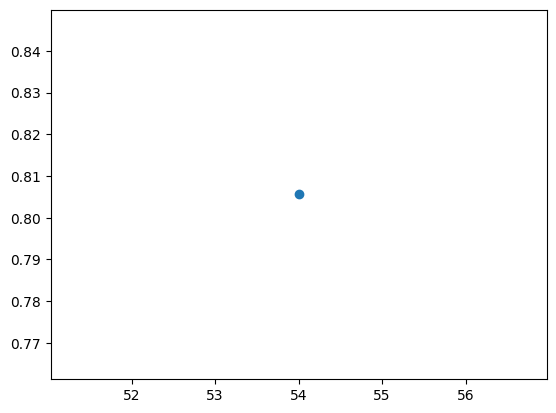

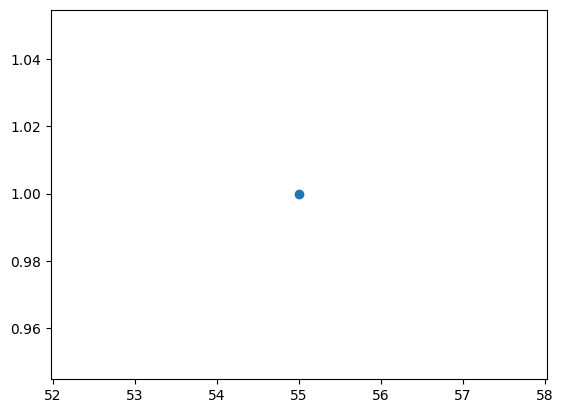

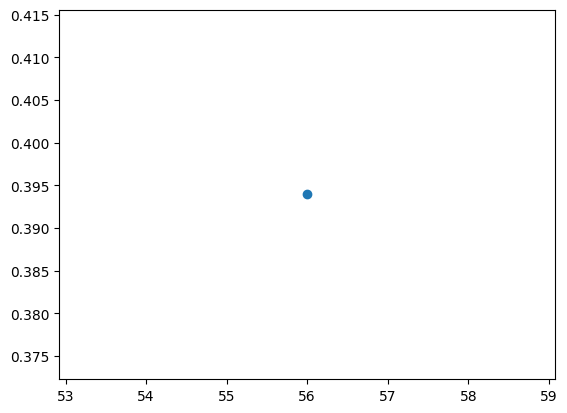

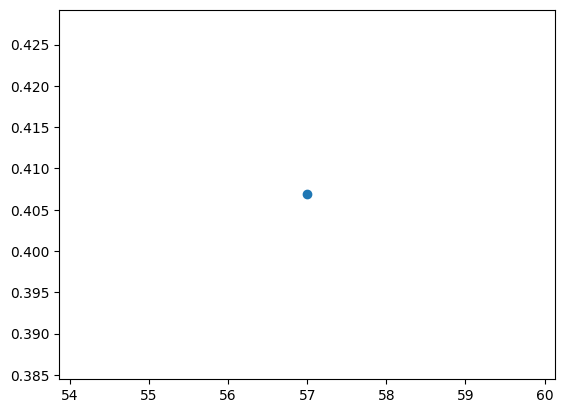

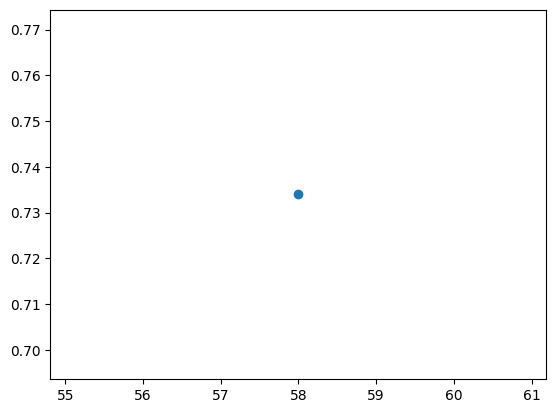

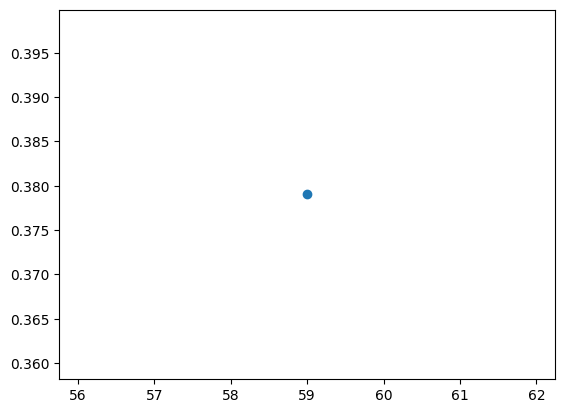

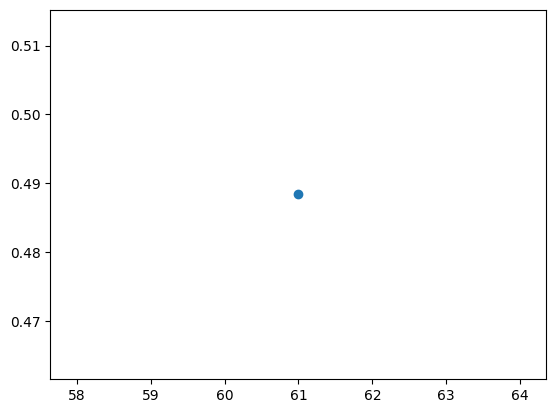

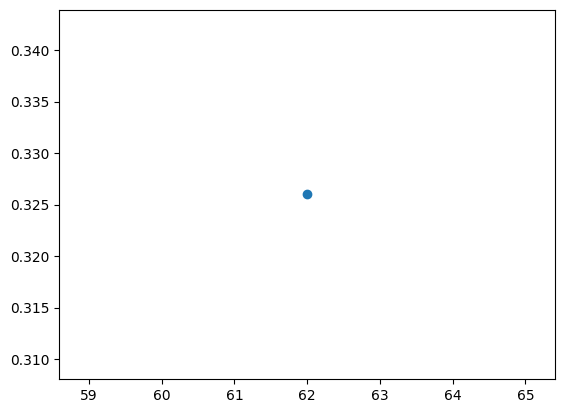

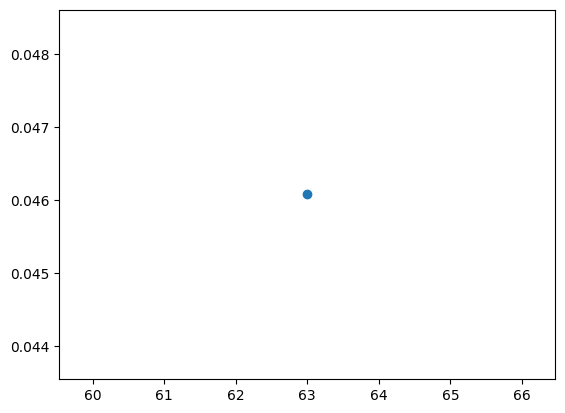

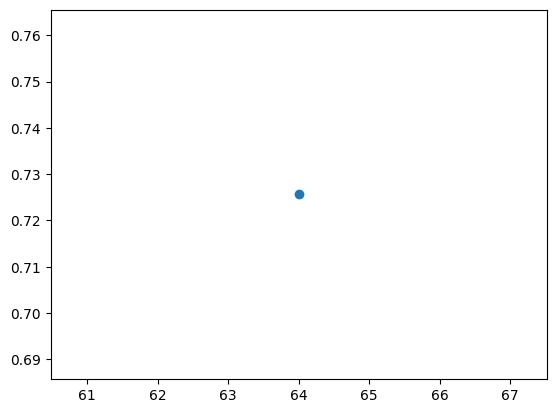

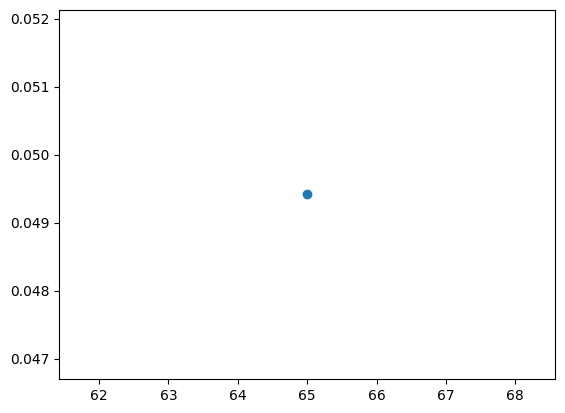

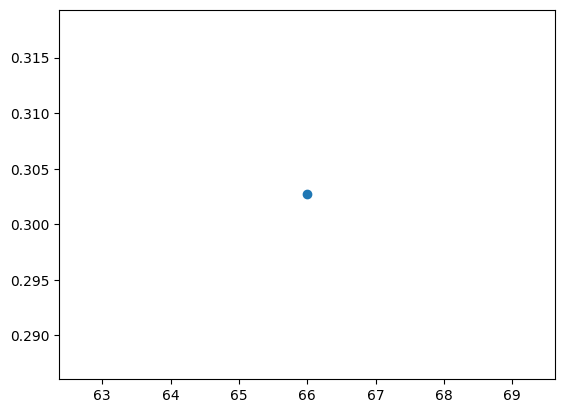

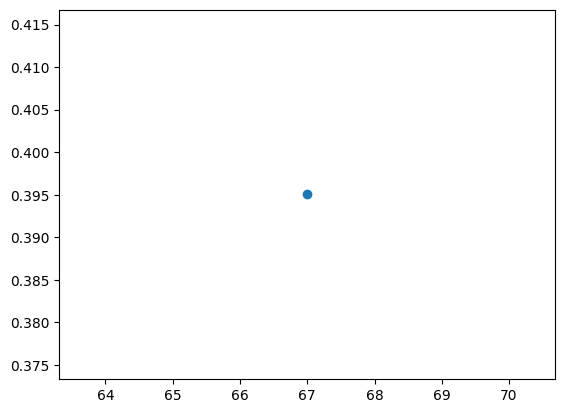

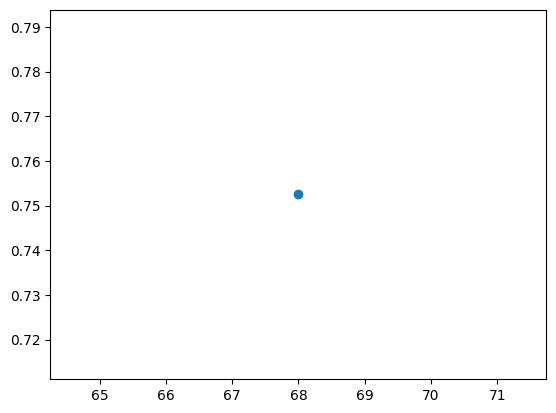

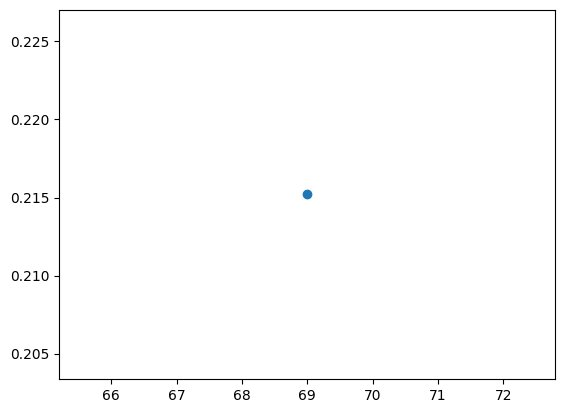

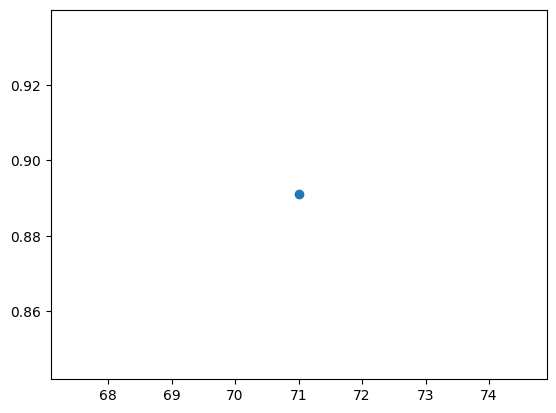

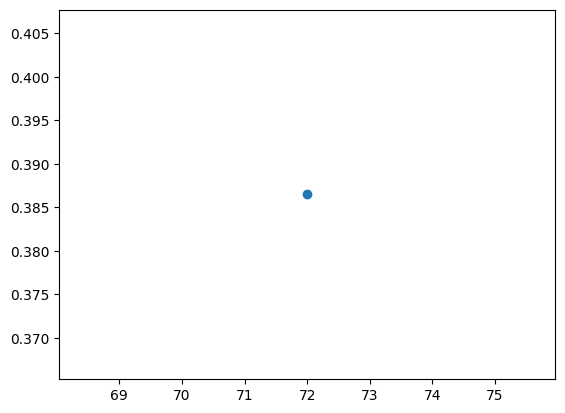

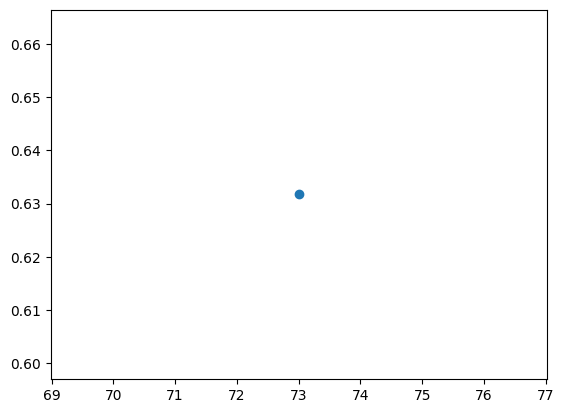

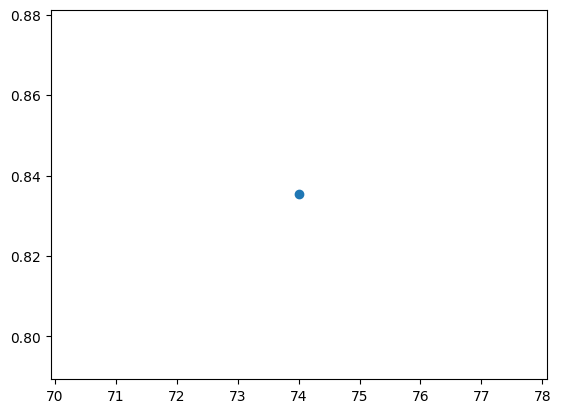

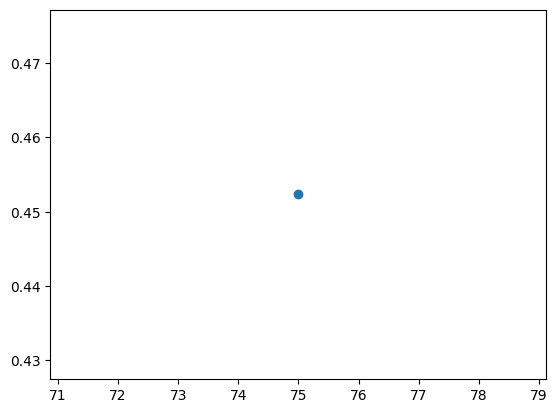

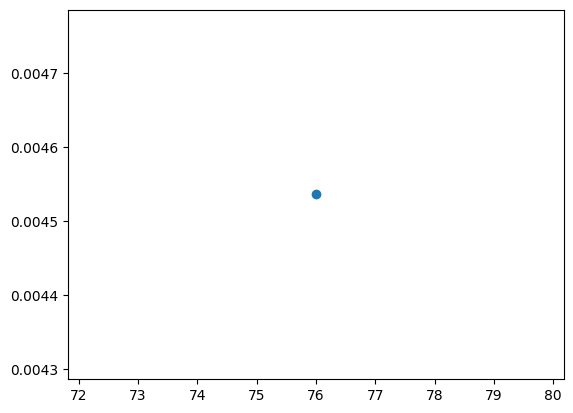

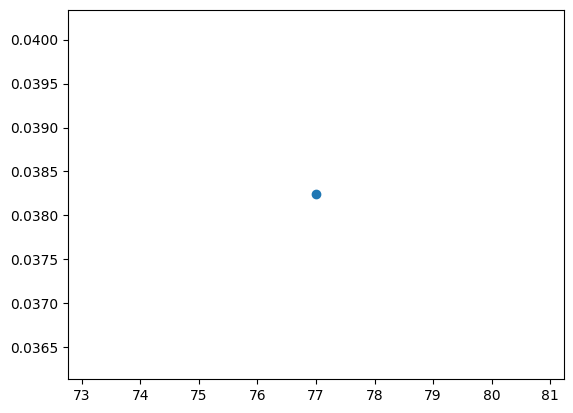

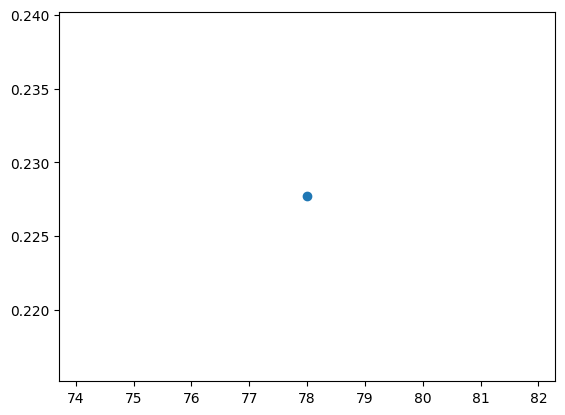

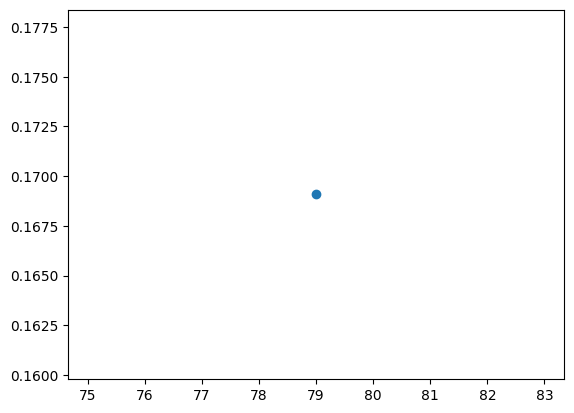

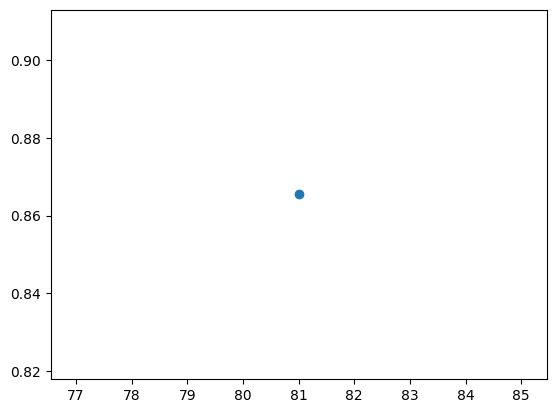

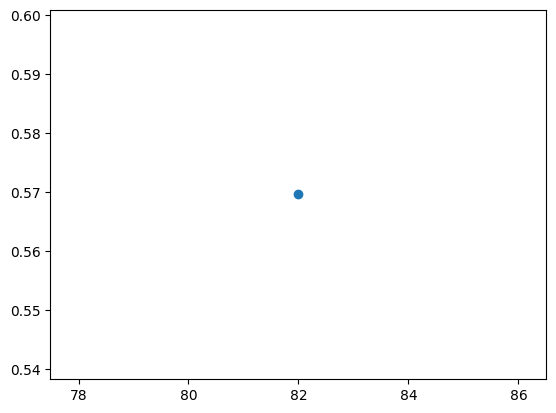

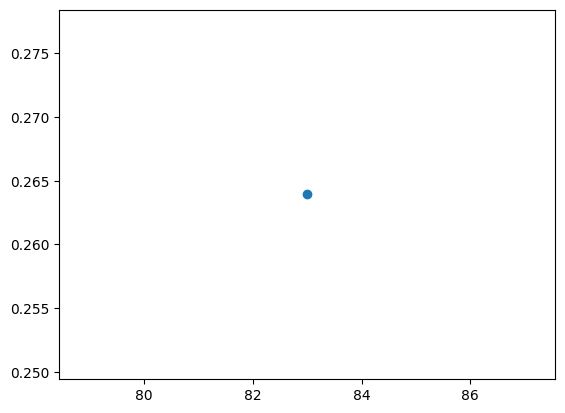

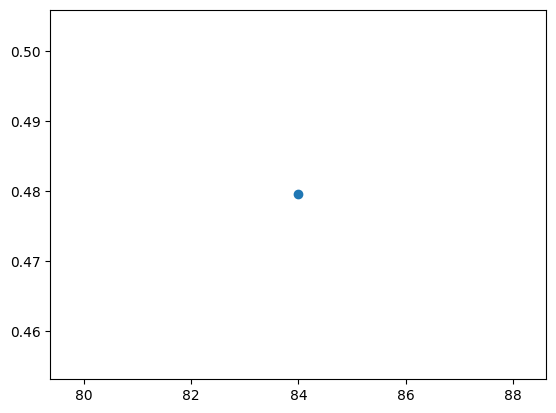

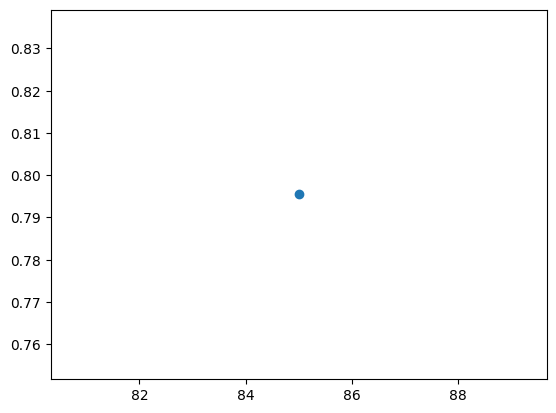

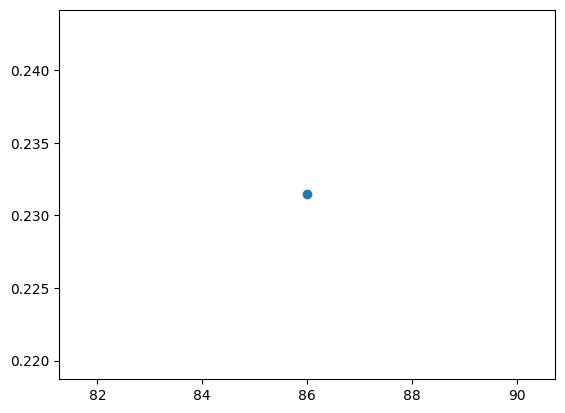

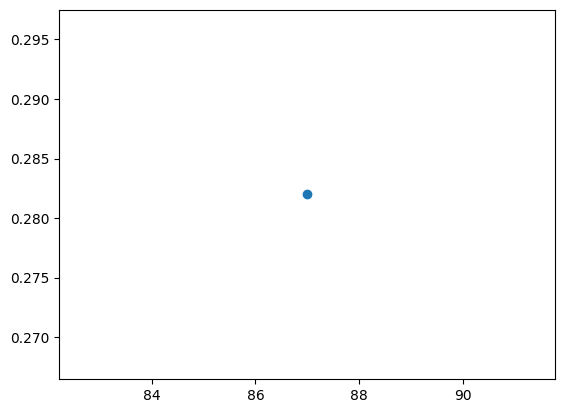

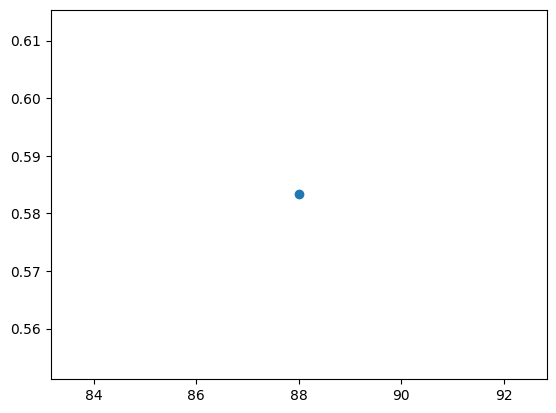

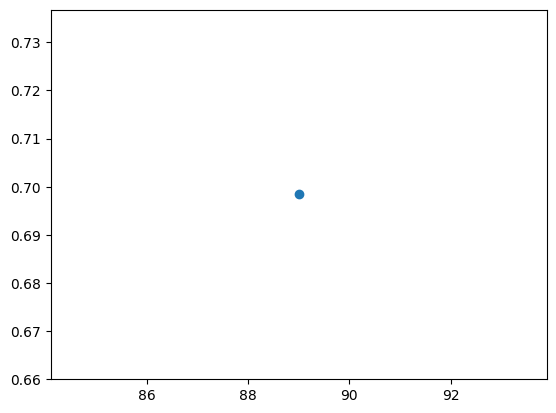

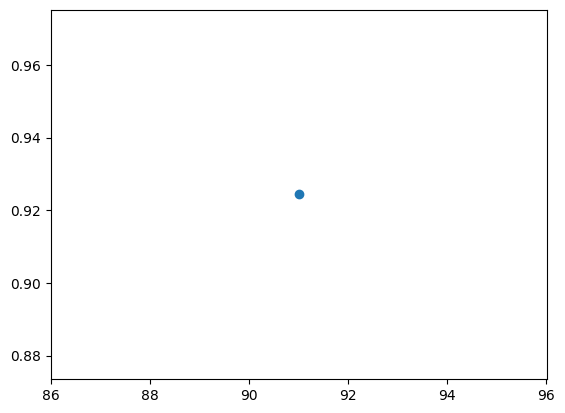

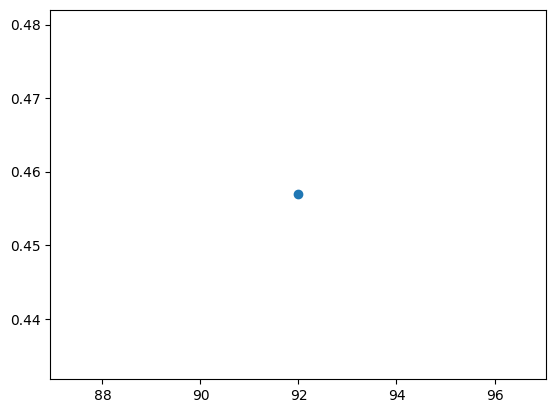

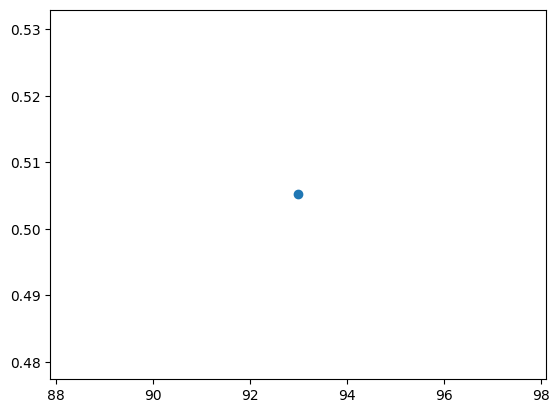

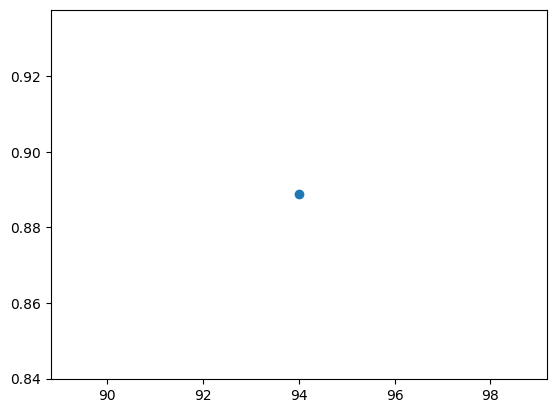

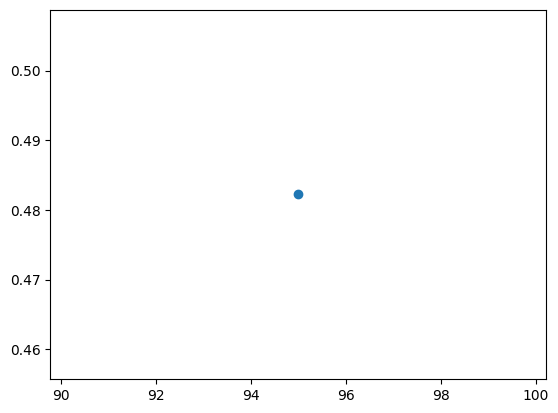

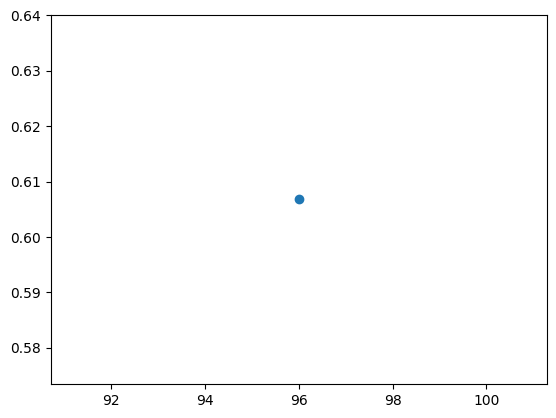

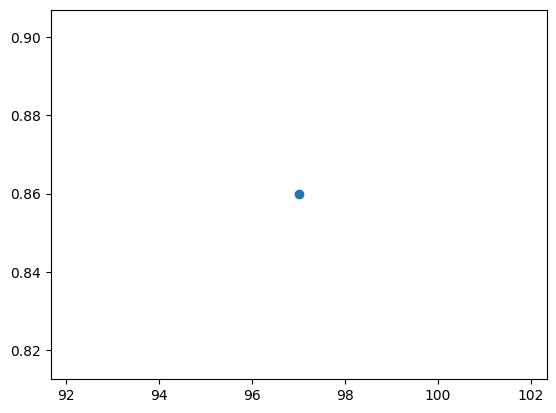

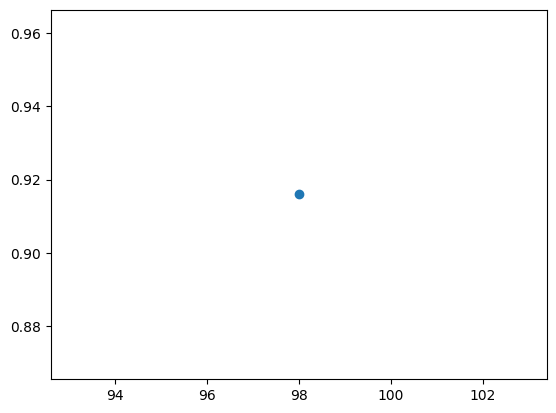

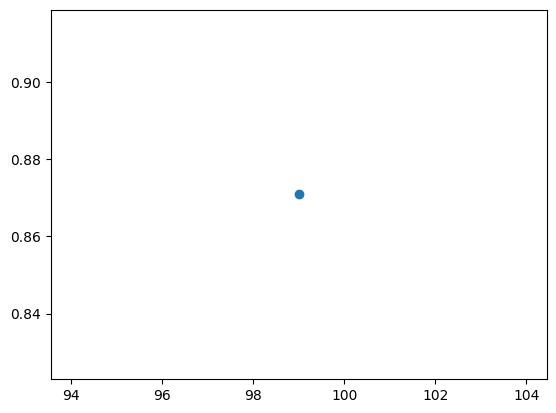

In [77]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])

for i in range(100):
    if (i%10 != 0):
        y = np.random.random()
        plt.scatter(i, y)
        plt.pause(0.1)
    else:
        plt.cla()

plt.show()